In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import scipy


from datetime import datetime 
import statsmodels.formula.api as smf  


from matplotlib import style
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties 
from pylab import mpl

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell 

InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None)

In [2]:
from pandas.tseries.offsets import MonthEnd # 月末
Market_ret = pd.read_csv('d:\python2025/Marketret_mon_stock2024.csv')
Market_ret['month'] = pd.to_datetime(Market_ret['month'], format='%b %Y') + MonthEnd(0)
Market_ret.set_index('month', inplace=True)
Market_ret.sort_index(inplace=True)
Market_ret = Market_ret.drop(columns=['Unnamed: 0'])
Market_ret

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q
month,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4


In [4]:
inflation = pd.read_csv('d:\python2025/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2025-03-31,-0.1
2025-04-30,-0.1
2025-05-31,-0.1


In [5]:
reg_data = pd.merge(Market_ret, inflation, left_index=True, right_index=True,how='left')
reg_data

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,cpi
month,,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1,2.2
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1,1.0
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1,1.6
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2,1.3
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2,3.6
...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,0.6
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,0.4
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,0.3


In [6]:
# 导出数据
reg_data.to_csv('d:\python2025/reg_data.csv')
# save as excel
reg_data.to_excel('d:\python2025/reg_data.xlsx')

In [7]:
reg_data = reg_data['2000':]

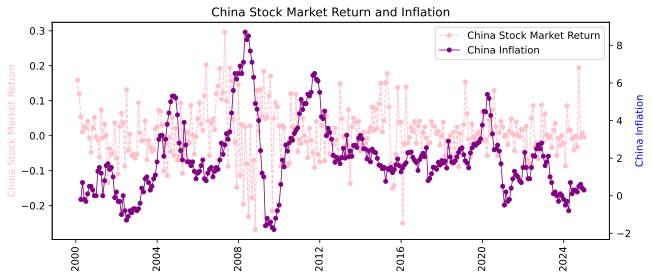

In [9]:
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(reg_data['ret'],color='pink',marker='o',linewidth=1.0,
         markersize=4,
         linestyle='--',label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return',color='pink')


data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation = 90)

ax2 = ax1.twinx()
ax2.plot(reg_data['cpi'].shift(2),color='purple',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Inflation')

ax2.set_ylabel('China Inflation',color='blue')

plt.title('China Stock Market Return and Inflation')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.savefig('d:\python2025/China Stock Market Return and Inflation.png',dpi = 1000,bbox_inches='tight')

plt.show();

In [10]:
reg_data[['ret','cpi']].describe().round(5)

,ret,cpi
count,300.00000,300.00000
mean,0.00668,2.02053
std,0.07576,1.92313
min,-0.26835,-1.80000
25%,-0.03981,0.80150
50%,0.00603,1.80000
75%,0.04154,2.78695
max,0.29604,8.70000


In [11]:
reg_data['ret'].skew()
reg_data['ret'].kurt()

0.00767185990102763

1.7083227513566661

In [12]:
from statsmodels.tsa.stattools import adfuller as ADF

adf_result = ADF(reg_data['ret'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -4.8575
p-value: 0.0000
Critical Values:
   1%: -3.4535
   5%: -2.8717
   10%: -2.5722
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [13]:
adf_result = ADF(reg_data['2000':]['cpi'])
print('\n原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')


原始序列的ADF检验结果:
ADF Statistic: -3.3288
p-value: 0.0136
Critical Values:
   1%: -3.4535
   5%: -2.8717
   10%: -2.5722
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [14]:

reg_data['lcpi'] = reg_data['cpi'].shift(2)/100
model_cpi = smf.ols('ret ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     6.079
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0142
Time:                        11:13:45   Log-Likelihood:                 353.13
No. Observations:                 298   AIC:                            -702.3
Df Residuals:                     296   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0193      0.007      2.673      0.0

C:\Users\单双\AppData\Local\Temp/ipykernel_29776/3801471225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['lcpi'] = reg_data['cpi'].shift(2)/100


In [15]:
reg_data['lret'] = reg_data['ret'].shift(1)
model_cpi_lag = smf.ols('ret ~ lcpi + lret',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     6.839
Date:                Thu, 16 Oct 2025   Prob (F-statistic):            0.00125
Time:                        11:13:57   Log-Likelihood:                 355.07
No. Observations:                 298   AIC:                            -704.1
Df Residuals:                     295   BIC:                            -693.0
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0172      0.006      2.653      0.0

C:\Users\单双\AppData\Local\Temp/ipykernel_29776/29721111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['lret'] = reg_data['ret'].shift(1)


Text(0.5, 1.0, "China's Stock Market")

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Return')

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.,
        21184.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

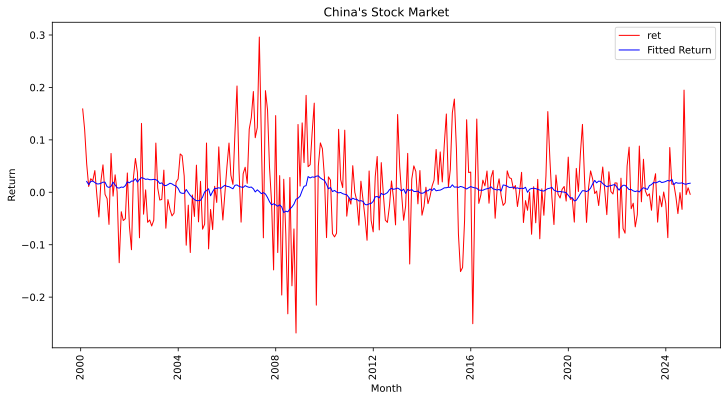

In [16]:
data = reg_data['2000-01':'2024-12'].copy()
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(12, 6))
plt.plot('ret',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Month') 
plt.ylabel('Return')  

data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation = 90)
plt.legend()
fig.savefig('d:\python2025/fitted_return.pdf', bbox_inches='tight') 

In [18]:
Q_reg_data = reg_data['1995-01':'2024-12'].resample('Q').apply({
    'ret':
    lambda x: (1 + x).prod() - 1,
    'cpi':
    lambda x: sum(x)
})
Q_reg_data['lag_cpi'] = Q_reg_data['cpi'].shift(1)
Q_reg_data

,ret,cpi,lag_cpi
month,,,
2000-03-31,0.368451,3.000000e-01,NaN
2000-06-30,0.059961,3.000000e-01,3.000000e-01
2000-09-30,-0.014135,8.000000e-01,3.000000e-01
2000-12-31,0.071593,2.800000e+00,8.000000e-01
2001-03-31,-0.004098,2.000000e+00,2.800000e+00
...,...,...,...
2023-12-31,-0.047820,-1.000000e+00,-2.000000e-01
2024-03-31,0.006789,-8.326673e-17,-1.000000e+00
2024-06-30,-0.034157,8.000000e-01,-8.326673e-17


In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

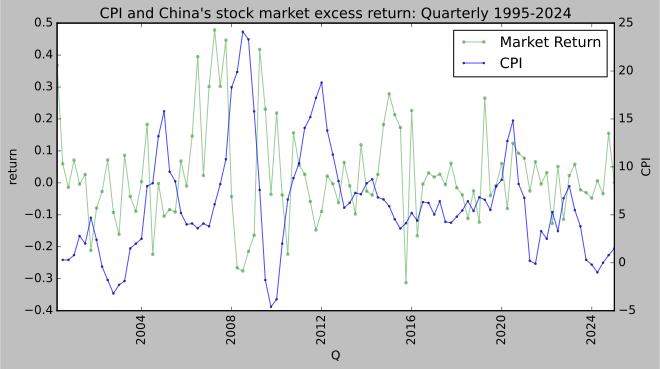

In [20]:
plt.style.use('classic')
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  

ax1.plot(Q_reg_data['ret'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Q')  
ax1.set_ylabel('return')  

ax1.set_title("CPI and China's stock market excess return: Quarterly 1995-2024") 

data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation = 90) 

ax2 = ax1.twinx()  
ax2.plot(Q_reg_data['lag_cpi'],
         color='blue',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='CPI')
ax2.set_ylabel('CPI') 


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.savefig('d:\python2025/Qcpi.pdf', bbox_inches='tight')
plt.show();

In [22]:
Q_reg_data['lcpi'] = Q_reg_data['cpi'].shift(1)
model_qcpi = smf.ols('ret ~ lcpi',
                 data=Q_reg_data['2000':'2024']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qcpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     4.408
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0384
Time:                        11:18:31   Log-Likelihood:                 50.322
No. Observations:                  99   AIC:                            -96.64
Df Residuals:                      97   BIC:                            -91.45
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0564      0.023      2.420      0.0

In [23]:
Q_reg_data['lret'] = Q_reg_data['ret'].shift(1)
model_qcpi_lag = smf.ols('ret ~ lcpi + lret',
                 data=Q_reg_data['2000':'2024']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qcpi_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     3.727
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0276
Time:                        11:18:40   Log-Likelihood:                 52.212
No. Observations:                  99   AIC:                            -98.42
Df Residuals:                      96   BIC:                            -90.64
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0455      0.019      2.409      0.0

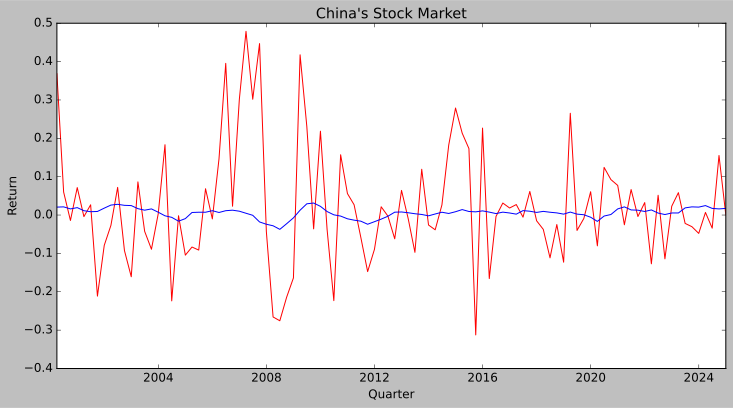

In [24]:
data = Q_reg_data['2000-01':'2024-12'].copy()
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(12, 6))
plt.plot('ret',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Quarter')
plt.ylabel('Return') 

plt.show();

In [27]:
reg_data['next_ret'] = reg_data['ret'].shift(-1) + 1
reg_data['next_ret2'] = reg_data['ret'].shift(-2) + 1
reg_data['next_ret3'] = reg_data['ret'].shift(-3) + 1
reg_data['future_3month_return'] = reg_data['next_ret'] * reg_data['next_ret2'] * reg_data['next_ret3'] - 1
reg_data

C:\Users\单双\AppData\Local\Temp/ipykernel_29776/690850194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['next_ret'] = reg_data['ret'].shift(-1) + 1
C:\Users\单双\AppData\Local\Temp/ipykernel_29776/690850194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['next_ret2'] = reg_data['ret'].shift(-2) + 1
C:\Users\单双\AppData\Local\Temp/ipykernel_29776/690850194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,cpi,lcpi,lret,next_ret,next_ret2,next_ret3,future_3month_return
month,,,,,,,,,,,,,,,,
2000-01-31,0.160838,0.140568,0.001856,0.158982,0.138712,0.369753,0.454586,0.543186,2000 Q1,-0.2,NaN,NaN,1.120168,1.054070,1.011158,0.193910
2000-02-29,0.122024,0.128347,0.001856,0.120168,0.126491,0.194615,0.306103,0.312229,2000 Q1,0.7,NaN,0.158982,1.054070,1.011158,1.025835,0.093367
2000-03-31,0.055926,0.104864,0.001856,0.054070,0.103008,0.093710,0.157335,0.096405,2000 Q1,-0.2,-0.002,0.120168,1.011158,1.025835,1.021865,0.059961
2000-04-30,0.013014,0.015806,0.001856,0.011158,0.013950,0.060182,0.045402,0.117584,2000 Q2,-0.3,0.007,0.054070,1.025835,1.021865,1.041389,0.091652
2000-05-31,0.027691,0.039638,0.001856,0.025835,0.037782,0.091987,0.057092,0.096799,2000 Q2,0.1,-0.002,0.011158,1.021865,1.041389,0.993453,0.057192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,0.6,0.002,-0.000624,1.194874,0.995473,1.008606,0.199701
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,0.4,0.005,-0.032586,0.995473,1.008606,0.996203,0.000228
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,0.3,0.006,0.194874,1.008606,0.996203,NaN,NaN


In [28]:
model_cpi_3month = smf.ols('marketret3 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_3month.summary())

                            OLS Regression Results                            
Dep. Variable:             marketret3   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5.924
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0155
Time:                        11:19:47   Log-Likelihood:                 143.93
No. Observations:                 296   AIC:                            -283.9
Df Residuals:                     294   BIC:                            -276.5
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0580      0.022      2.617      0.0

In [29]:
model_cpi_6month = smf.ols('marketret6 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_6month.summary())

                            OLS Regression Results                            
Dep. Variable:             marketret6   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     4.065
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0447
Time:                        11:19:55   Log-Likelihood:                -26.479
No. Observations:                 293   AIC:                             56.96
Df Residuals:                     291   BIC:                             64.32
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1039      0.046      2.256      0.0

In [30]:
model_cpi_12month = smf.ols('marketret12 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(       
                        cov_type='HAC', cov_kwds={'maxlags': 6})    
print(model_cpi_12month.summary())

                            OLS Regression Results                            
Dep. Variable:            marketret12   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.792
Date:                Thu, 16 Oct 2025   Prob (F-statistic):              0.182
Time:                        11:20:03   Log-Likelihood:                -214.26
No. Observations:                 287   AIC:                             432.5
Df Residuals:                     285   BIC:                             439.8
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1801      0.105      1.723      0.0

In [31]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model_cpi, model_cpi_3month, model_cpi_6month, model_cpi_12month],
                            float_format='%0.3f',
                            stars=True, 
                            model_names=["Next Month's Return", "Next 3 Months' Return", "Next 6 Months' Return", "Next 12 Months' Return"],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Stock Market Return')

print(results_table)

                         Table - OLS Regressions: Forecast Stock Market Return
                 Next Month's Return Next 3 Months' Return Next 6 Months' Return Next 12 Months' Return
-------------------------------------------------------------------------------------------------------
Intercept        0.019***            0.058***              0.104**               0.180*                
                 (0.007)             (0.022)               (0.046)               (0.105)               
lcpi             -0.666**            -1.884**              -2.882**              -3.436                
                 (0.270)             (0.774)               (1.429)               (2.566)               
R-squared        0.029               0.056                 0.042                 0.016                 
R-squared Adj.   0.026               0.053                 0.039                 0.013                 
No. observations 298                 296                   293                   287     

In [32]:
reg_data['lcpi'] = reg_data['cpi'].shift(1)
model_cpiself = smf.ols('cpi~lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpiself.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1501.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          3.67e-118
Time:                        11:20:31   Log-Likelihood:                -262.10
No. Observations:                 299   AIC:                             528.2
Df Residuals:                     297   BIC:                             535.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0974      0.047      2.055      0.0

C:\Users\单双\AppData\Local\Temp/ipykernel_29776/4002790972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['lcpi'] = reg_data['cpi'].shift(1)


In [33]:
model_cpiself = smf.ols('ret~cpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpiself.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.704
Date:                Thu, 16 Oct 2025   Prob (F-statistic):              0.101
Time:                        11:20:41   Log-Likelihood:                 351.62
No. Observations:                 300   AIC:                            -699.2
Df Residuals:                     298   BIC:                            -691.8
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0174      0.008      2.304      0.0